# Pipeline Prediction

In [ ]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn_genetic.callbacks import LogbookSaver, ProgressBar
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Import the data and split it in train and test sets

In [2]:
data = load_diabetes()

y = data["target"]
X = data["data"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Define the regressor to tune

In [3]:
rg = GradientBoostingRegressor()
pipe = Pipeline([("scaler", StandardScaler()), ("rg", rg)])

### Create the CV strategy and define the param grid

In [4]:
cv = KFold(n_splits=5, shuffle=True)

param_grid = {
    "rg__n_estimators": Integer(50, 600),
    "rg__loss": Categorical(["absolute_error", "squared_error"]),
    "rg__max_depth": Integer(2, 10),
    "rg__learning_rate": Continuous(0.001, 0.01, distribution="log-uniform")}

### Define the GASearchCV options

In [5]:
evolved_estimator = GASearchCV(
    estimator=pipe,
    cv=cv,
    scoring="neg_mean_squared_error",
    population_size=8,
    generations=15,
    tournament_size=3,
    elitism=True,
    keep_top_k=4,
    crossover_probability=0.9,
    mutation_probability=0.08,
    param_grid=param_grid,
    criteria="max",
    algorithm="eaMuCommaLambda",
    n_jobs=-1)

### Optionally, create some Callbacks

In [6]:
callbacks = [LogbookSaver(checkpoint_path="./logbook.pkl")]

### Fit the model and see some results

In [7]:
evolved_estimator.fit(X_train, y_train, callbacks=callbacks)
y_predict_ga = evolved_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_predict_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	8     	-4238.26	565.058    	-3756.78   	-5523.09   
1  	16    	-4051.7 	352.254    	-3756.29   	-4631.79   
2  	16    	-3665.2 	70.1723    	-3572.13   	-3749.68   
3  	16    	-3587.2 	49.7041    	-3507.56   	-3644.64   
4  	16    	-3513.45	102.322    	-3420.14   	-3698.88   
5  	16    	-3678.71	164.066    	-3521.83   	-4011.67   
6  	15    	-3547.3 	35.2384    	-3500.55   	-3604.69   
7  	16    	-3468.1 	51.9507    	-3379.15   	-3542.45   
8  	16    	-3472.2 	51.3204    	-3410.31   	-3581.8    
9  	16    	-3434.18	43.9115    	-3371.14   	-3514.54   
10 	16    	-3410.84	94.4055    	-3325.11   	-3560.57   
11 	16    	-3493.9 	93.8796    	-3393.02   	-3662.27   
12 	16    	-3506.98	32.4934    	-3478.73   	-3588.94   
13 	16    	-3515.91	133.628    	-3300.73   	-3696.27   
14 	16    	-3481.82	58.9704    	-3399.49   	-3616.37   
15 	16    	-3468.11	10.7602    	-3450.02   	-3476.26   


In [8]:
print(evolved_estimator.best_params_)
print("mse: ", "{:.2f}".format(mse))
print("Best k solutions: ", evolved_estimator.hof)

{'rg__n_estimators': 561, 'rg__loss': 'squared_error', 'rg__max_depth': 3, 'rg__learning_rate': 0.006219524925263899}
mse:  3169.70
Best k solutions:  {0: {'rg__n_estimators': 561, 'rg__loss': 'squared_error', 'rg__max_depth': 3, 'rg__learning_rate': 0.006219524925263899}, 1: {'rg__n_estimators': 504, 'rg__loss': 'squared_error', 'rg__max_depth': 3, 'rg__learning_rate': 0.006219524925263899}, 2: {'rg__n_estimators': 517, 'rg__loss': 'squared_error', 'rg__max_depth': 3, 'rg__learning_rate': 0.006219524925263899}, 3: {'rg__n_estimators': 561, 'rg__loss': 'squared_error', 'rg__max_depth': 3, 'rg__learning_rate': 0.004507098298712037}}


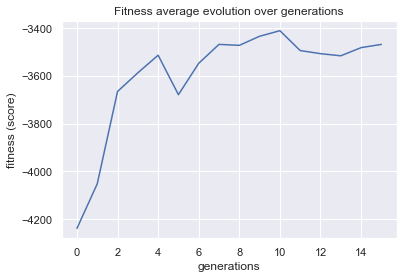

In [9]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()

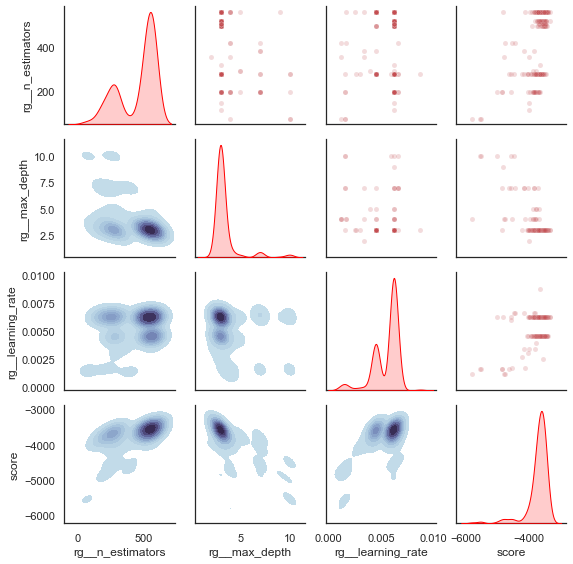

In [10]:
plot_search_space(evolved_estimator)
plt.show()